In [9]:
# Part 3. Wine-Testing Machine
# 1.

import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset
df = pd.read_csv('red_wine.csv')

# Generate the profiling report
profile = ProfileReport(df, title="Red Wine Profiling Report")

# Display the report within a Jupyter notebook
profile.to_widgets()

# Generate an HTML file of the report
profile.to_file("red_wine_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Part 3. Wine-Testing Machine
# 2.

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('red_wine.csv')
X = data.drop(columns='type')
y = data['type']

# Define the models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Define the cross-validation
cv = StratifiedKFold(n_splits=10)

# Define the scorers
scorers = {
    'AUC': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr'),
    'Accuracy': make_scorer(accuracy_score)
}

# Apply cross-validation
results = {}
for model_name, model in models.items():
    model_results = {}
    for scorer_name, scorer in scorers.items():
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
        model_results[scorer_name] = score
    results[model_name] = model_results

# Display the results
pd.DataFrame(results).T

,AUC,Accuracy
Baseline,0.500000,0.528887
Logistic Regression,0.879902,0.784785
Naive Bayes,0.895408,0.821627
Decision Tree,0.739796,0.740986
SVM-Linear,0.881489,0.791863
SVM-RBF,0.868920,0.535844
Random Forest,0.891721,0.795312


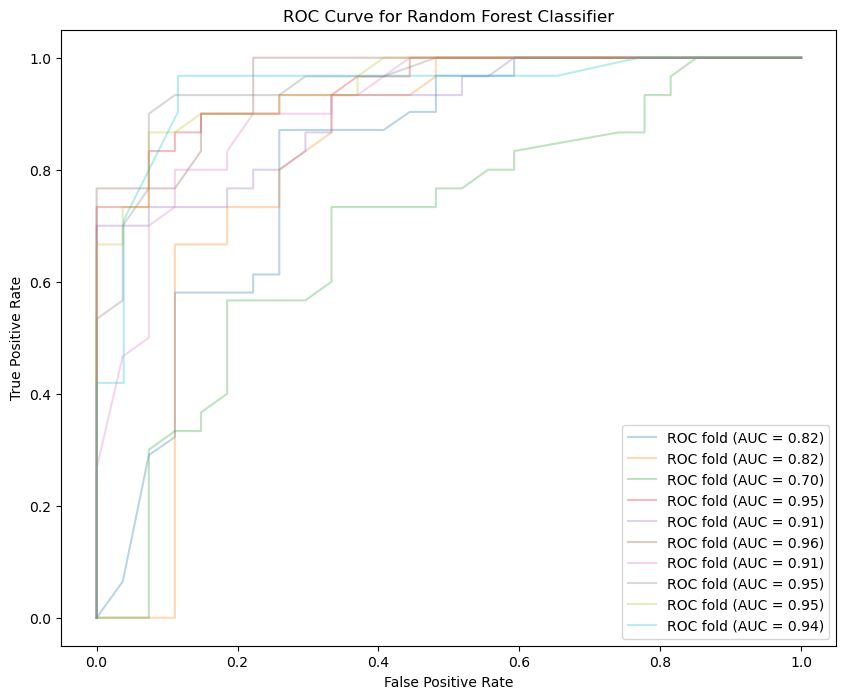

In [17]:
# Part 3. Wine-Testing Machine
# 3.

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('red_wine.csv')
X = data.drop(columns='type')
y = (data['type'] == 'high').astype(int)  # Convert the 'type' column to binary

# Define the model
model = RandomForestClassifier()

# Define the cross-validation
cv = StratifiedKFold(n_splits=10)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
for train, test in cv.split(X, y):
    model.fit(X.iloc[train], y.iloc[train])
    probs = model.predict_proba(X.iloc[test])[:, 1]
    fpr, tpr, _ = roc_curve(y.iloc[test], probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, alpha=0.3, label=f'ROC fold (AUC = {roc_auc:.2f})')

plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [23]:
# Part 3. Wine-Testing Machine
# 4.

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('white_wine.csv')
X = data.drop(columns='type')
y = data['type']

# Define the models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Define the cross-validation
cv = StratifiedKFold(n_splits=10)

# Define the scorers
scorers = {
    'AUC': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr'),
    'Accuracy': make_scorer(accuracy_score)
}

# Apply cross-validation
results = {}
for model_name, model in models.items():
    model_results = {}
    for scorer_name, scorer in scorers.items():
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
        model_results[scorer_name] = score
    results[model_name] = model_results

# Display the results
pd.DataFrame(results).T

,AUC,Accuracy
Baseline,0.500000,0.783929
Logistic Regression,0.966667,0.858929
Naive Bayes,0.950000,0.932143
Decision Tree,0.808333,0.844643
SVM-Linear,0.966667,0.858929
SVM-RBF,0.913095,0.783929
Random Forest,0.933333,0.896429


In [24]:
# Part 3. Wine-Testing Machine
# 4.

import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Load the white wine data
white_wine_data = pd.read_csv('white_wine.csv')
X_white = white_wine_data.drop(columns='type')
y_white = (white_wine_data['type'] == 'high').astype(int)  # Convert 'type' to binary

# Define the best model (assuming Random Forest was the best)
best_model = RandomForestClassifier()

# Train the best model with red wine data
# Load the red wine data
red_wine_data = pd.read_csv('red_wine.csv')
X_red = red_wine_data.drop(columns='type')
y_red = (red_wine_data['type'] == 'high').astype(int)  # Convert 'type' to binary
best_model.fit(X_red, y_red)

# Get the predicted probabilities for the white wine data
y_white_probs = best_model.predict_proba(X_white)[:, 1]

# Calculate the AUC score
auc_score_white = roc_auc_score(y_white, y_white_probs)

print(f"The AUC score for the best model on the white wine data is: {auc_score_white:.3f}")

The AUC score for the best model on the white wine data is: 0.967
